## NLP Techniques
### Para comenzar a usa tecnicas de Procesamiento de lenguaje natural es necesario tener en cuenta 3 aspectos:
1- Entradas:
    Las entradas para este proceso deben ser datos limpios, y luego de que se halla realizado un EDA Satisfactorio

2- Tecnicas de procesamiento de lenguaje natural. Como analisis de sentimiento, tipo de texto,topicos y generacion de texto...

3- Salidas: Informacion adicional que ayudará en el proceso de entender y responder la pregunta inicial


In [1]:
import pandas as pd
data = pd.read_pickle('corpus.pkl')
data


,transcript,full names
ali,ladies and gentlemen please welcome to the sta...,Ali Wong
anthony,thank you thank you thank you san francisco th...,Anthony Jeselnik
bill,all right thank you thank you very much thank...,Bill Burr
bo,bo what old macdonald had a farm e i e i o and...,Bo Burnham
dave,this is dave he tells dirty jokes for a living...,Dave Chappelle
hasan,whats up davis whats up im home i had to bri...,Hasan Minhaj
jim,ladies and gentlemen please welcome to the ...,Jim Jefferies
joe,ladies and gentlemen welcome joe rogan wha...,Joe Rogan
john,all right petunia wish me luck out there you w...,John Mulaney
louis,introfade the music out lets roll hold there l...,Louis C.K.


In [2]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full names,polarity,subjectivity
ali,ladies and gentlemen please welcome to the sta...,Ali Wong,0.066765,0.479597
anthony,thank you thank you thank you san francisco th...,Anthony Jeselnik,0.046428,0.565222
bill,all right thank you thank you very much thank...,Bill Burr,0.008257,0.543996
bo,bo what old macdonald had a farm e i e i o and...,Bo Burnham,0.073695,0.553921
dave,this is dave he tells dirty jokes for a living...,Dave Chappelle,-0.005095,0.515816
hasan,whats up davis whats up im home i had to bri...,Hasan Minhaj,0.080180,0.464121
jim,ladies and gentlemen please welcome to the ...,Jim Jefferies,0.038131,0.538653
joe,ladies and gentlemen welcome joe rogan wha...,Joe Rogan,0.005476,0.556626
john,all right petunia wish me luck out there you w...,John Mulaney,0.074745,0.492139
louis,introfade the music out lets roll hold there l...,Louis C.K.,0.051626,0.523858


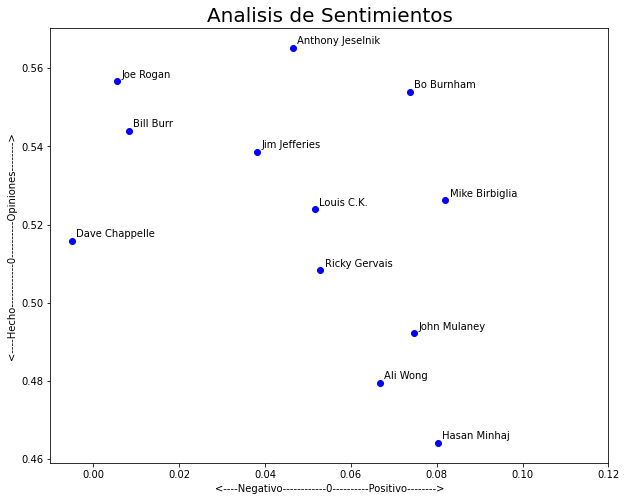

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,8]

for index, comediante in enumerate(data.index):
    x = data.polarity.loc[comediante]
    y = data.subjectivity.loc[comediante]
    plt.scatter(x,y,color='blue')
    plt.text(x+.001,y+.001,data['full names'][index],fontsize = 10)
    plt.xlim(-.01, .12)

plt.title("Analisis de Sentimientos", fontsize = 20)
plt.xlabel('<----Negativo------------0----------Positivo-------->')
plt.ylabel('<----Hecho------------0----------Opiniones-------->')
plt.show()


## Otro Analisis que se puede realizar en este caso es el comportamiento temporal de la rutina de la rutina completa

Primero dividimos cada show de cada comediante en n partes iguales
para ver como varia a lo largo del tiempo la polaridad y la subjetividad de cada uno


In [4]:
import numpy as np
import math
from split_text import *

list_pieces = []

for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
list_pieces

[['ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with cause i have to pee in like ten minutes but thank you everybody so much for coming um its a very exciting day for me its been a very exciting year for me i turned  this year yes thank you five people i appreciate that uh i can tell that im getting older because now when i see an  girl my automatic thought is fuck you fuck you i dont even know you but fuck you cause im straight up jealous im jealous first and foremost of their metabolism because  girls they could just eat like shit and then they take a shit and have a sixpack right they got thatthat beautiful inner thigh clearance where they put their feet together and theres that huge gap here with the light of potential just radiating throughand then when they go to sleep they just go to sleep right they dont have insomnia yet they dont know what its like to have to take 

Una vez que tengamos cada comediante con sus trancripts divididos en partes iguales
vamos a analizar con textblob los sentimientos y subjetividad en cada pedazo del show




In [5]:
polarity_trancript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).polarity)
    polarity_trancript.append(polarity_piece)
polarity_trancript

[[0.10833736884584345,
  0.051301699083389225,
  0.09354385693671408,
  0.08631094104308389,
  -0.02063074352548037,
  0.0847671681688075,
  0.06316358299235013,
  0.08647907647907646,
  0.028597343699384534,
  0.07318211068211068],
 [0.1260317900256925,
  -0.06823347107438017,
  -0.044710012210012216,
  0.014602659245516405,
  0.15882883456412872,
  0.05631928181108507,
  0.0694419642857143,
  0.10123775751435324,
  -0.03551490672026391,
  0.06263415404040402],
 [-0.028126222542889198,
  -0.006761009327973609,
  0.01004653315259375,
  0.002889684012132985,
  -0.041025120712620725,
  0.05399361806578302,
  0.023047323047323032,
  -0.023440806878306887,
  -0.003607229123533475,
  0.09550080834803058],
 [0.17987394957983202,
  -0.006682027649769569,
  -0.04203737191078963,
  0.09192962325492443,
  0.026613104409714577,
  0.02092448292448292,
  -0.07842789598108746,
  0.03325106266282739,
  0.21970927474352137,
  0.24218253968253964],
 [-0.05073496534764142,
  -0.06793290043290044,
  0.03

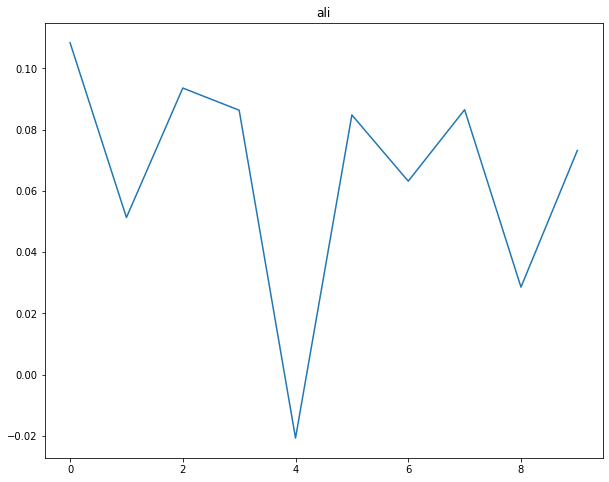

In [6]:
plt.plot(polarity_trancript[0])
plt.title(data['full names'].index[0])
plt.show()

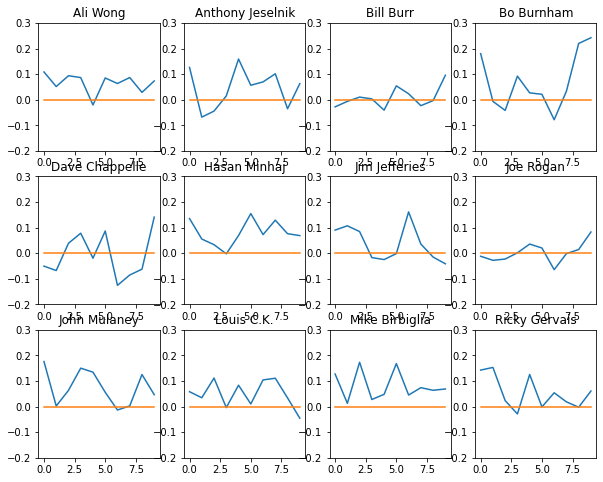

In [8]:
for index,comediante in enumerate(data.index):
    plt.subplot(3,4, index+1)
    plt.plot(polarity_trancript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full names'][index])
    plt.ylim(ymin=-.2,ymax=.3)
plt.show()

## Topic Modeling